In [1]:
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Input Images')

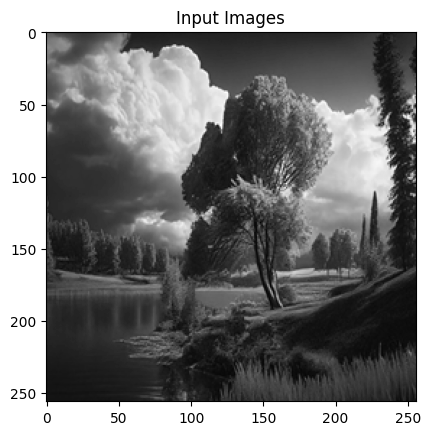

In [2]:

# Load an example image
image_path = 'image/nature256.png'  # Replace with the path to your image
original_image = plt.imread(image_path)
gray_image = np.mean(original_image, axis=-1)
plt.imshow(gray_image, cmap='gray')
plt.title('Input Images')

In [3]:
# Define the Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

In [17]:
# Get the dimensions of the image and the kernel
image_height, image_width = gray_image.shape
kernel_size = laplacian_kernel.shape[0]


# Initialize an empty result array
laplacian_result = np.zeros_like(gray_image, dtype=np.float64)

# # Extract the local region around the pixel
# p,q = 4,7
# local_region = gray_image[p - 1:p + 2, q - 1:q + 2]

# print(local_region)

# print(local_region * laplacian_kernel)

# # Perform element-wise multiplication with the Laplacian kernel
# convolution_result = np.sum(local_region * laplacian_kernel)
# print(convolution_result)


# Iterate over each pixel in the image
for i in range(1, image_height - 1):
    for j in range(1, image_width - 1):
        # Extract the local region around the pixel
        local_region = gray_image[i - 1:i + 2, j - 1:j + 2]

        # Perform element-wise multiplication with the Laplacian kernel
        convolution_result = np.sum(local_region * laplacian_kernel)

        # Store the result in the Laplacian result array
        laplacian_result[i, j] = (convolution_result+2)*(255//4)

print('Max : ',np.max(laplacian_result,),' Min : ', np.min(laplacian_result))
# print(laplacian_result)

# Ensure the result is within the valid intensity range
laplacian_result = np.clip(laplacian_result, 0, 255)
print('Max : ',np.max(laplacian_result,),' Min : ', np.min(laplacian_result))


Max :  200.79705530405045  Min :  0.0
Max :  200.79705530405045  Min :  0.0


Text(0.5, 1.0, 'Laplacian Transformed Image')

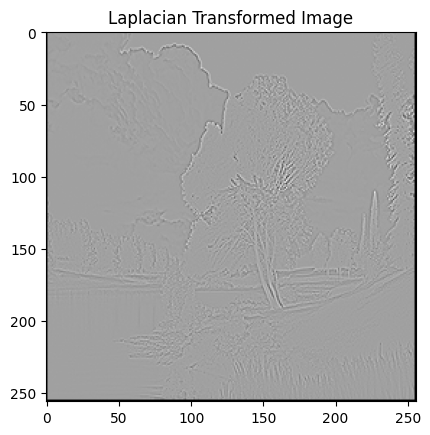

In [18]:
plt.imshow(laplacian_result, cmap='gray')
plt.title('Laplacian Transformed Image')

In [19]:
# # Apply convolution with the Laplacian kernel
# laplacian_result = cv2.filter2D(gray_image, cv2.CV_64F, laplacian_kernel)

# # Add the Laplacian result to the original image to enhance details
# sharpened_image = gray_image + laplacian_result

# # Display the images
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')

# plt.subplot(1, 3, 2)
# plt.imshow(laplacian_result, cmap='gray')
# plt.title('Laplacian Result')

# plt.subplot(1, 3, 3)
# plt.imshow(sharpened_image, cmap='gray')
# plt.title('Sharpened Image')

# plt.show()